# Processing data for wave height forecast
In this notebook, we process the data that we use to train and fine tune our models. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-v0_8-darkgrid')

## 1. Wave data

In [17]:
# Read raw data
# ==============================================================================
# Directory containing the CSV files
directory = '/Users/alvarocorralescano/Documents/GitHub/wave-height-app/Data/mooloolaba'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# List to store each DataFrame
df_list = []

# Read each CSV file and append it to the list
for file in csv_files:
    file_path = os.path.join(directory, file)
    _df = pd.read_csv(file_path)
    
    # Assume the datetime column is named 'datetime_column_name', change as needed
    _df['Date/Time (AEST)'] = pd.to_datetime(_df['Date/Time (AEST)'])
    
    # Convert datetime to desired format
    _df['Date/Time (AEST)'] = _df['Date/Time (AEST)'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    df_list.append(_df)

# Concatenate all DataFrames vertically
df = pd.concat(df_list)
df.drop(columns = ['_id'], inplace = True)

# Now, combined_df contains all the data stacked on top of each other
df

,Date/Time (AEST),Hs (m),Hmax (m),Tz (s),Tp (s),Peak Direction (degrees),SST (degrees C)
0,2023-01-01 00:00:00,2.126,3.10,6.688,10.737,85.0,25.10
1,2023-01-01 00:30:00,2.049,2.90,6.595,10.191,90.0,25.10
2,2023-01-01 01:00:00,2.126,3.46,6.856,11.378,80.0,25.10
3,2023-01-01 01:30:00,2.105,3.33,6.637,10.748,94.0,25.05
4,2023-01-01 02:00:00,1.876,3.02,6.286,10.223,84.0,25.05
...,...,...,...,...,...,...,...
4363,2024-03-31 21:30:00,1.251,2.22,4.937,7.038,125.0,25.70
4364,2024-03-31 22:00:00,1.315,2.30,5.370,7.366,83.0,25.70
4365,2024-03-31 22:30:00,1.254,2.15,5.186,8.166,85.0,25.70
4366,2024-03-31 23:00:00,1.190,1.88,4.951,7.336,85.0,25.65


In [18]:
# Slice off variable of interest
# ==============================================================================
df.rename(columns = {
    'Date/Time (AEST)':'datetime',
    'Hs (m)': 'wave_height_significant', 
    'Hmax (m)':'wave_height_max',
    'Tz (s)':'wave_period_upx',
    'Tp (s)':'wave_period_peak',
    'Peak Direction (degrees)': 'wave_direction',
    'SST (degrees C)':'sea_temperature'
    }, inplace = True)
df['datetime'] = pd.to_datetime(df['datetime'])
df.sort_values(by=['datetime'], inplace=True)
df.set_index(keys = 'datetime', inplace=True)
df = df.asfreq('30min')

print(df.shape)
df.head(10)

(39408, 6)


,wave_height_significant,wave_height_max,wave_period_upx,wave_period_peak,wave_direction,sea_temperature
datetime,,,,,,
2022-01-01 00:00:00,2.477,4.110,6.136,8.230,90.0,25.75
2022-01-01 00:30:00,2.259,3.240,5.871,8.179,98.0,25.75
2022-01-01 01:00:00,2.268,4.280,5.752,8.174,87.0,25.80
2022-01-01 01:30:00,2.452,3.970,5.987,8.719,80.0,25.80
2022-01-01 02:00:00,2.260,3.514,5.824,8.654,90.0,25.75
2022-01-01 02:30:00,2.386,3.770,6.160,8.895,90.0,25.75
2022-01-01 03:00:00,2.462,4.490,6.032,8.730,84.0,25.80
2022-01-01 03:30:00,2.321,3.640,6.110,8.255,80.0,25.75
2022-01-01 04:00:00,2.481,4.742,6.230,8.586,83.0,25.75


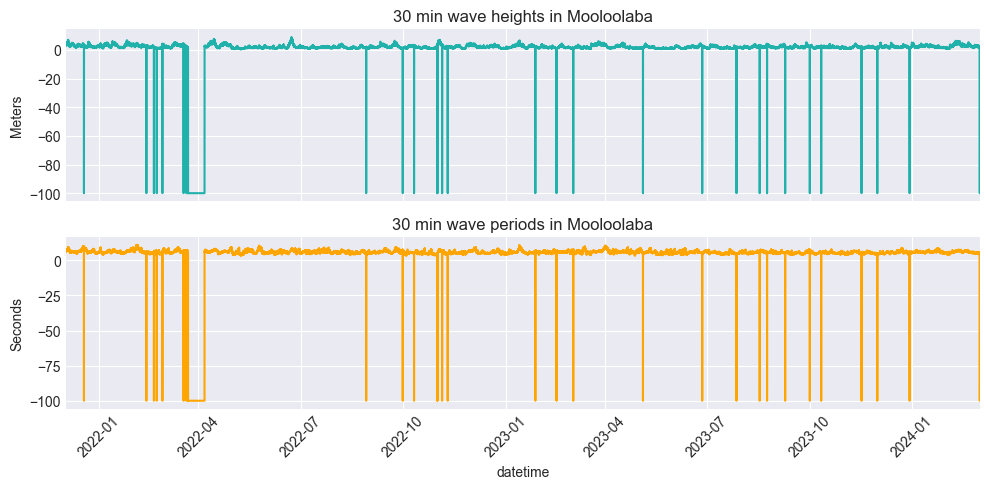

In [20]:
# Plot raw data
# ==============================================================================
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)  # Share x-axis

# Plot data
df['wave_height_max'].plot(ax=ax[0], color='lightseagreen')
df['wave_period_upx'].plot(ax=ax[1], color='orange')

# Set titles and labels
ax[0].set_title('30 min wave heights in Mooloolaba')
ax[1].set_title('30 min wave periods in Mooloolaba')
ax[0].set_ylabel('Meters')
ax[1].set_ylabel('Seconds')

# Customize x-axis ticks and labels
xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='3M')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks.strftime('%Y-%m'), rotation=45)

# Add grid
for axis in ax:
    axis.grid(True)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

### Dealing with null values. 
Null value is -99.900


In [33]:
print(df['wave_height_max'].value_counts().head())
print(df['wave_period_upx'].value_counts().head())

wave_height_max
-99.90    762
 1.64     220
 1.59     218
 1.63     218
 1.41     214
Name: count, dtype: int64
wave_period_upx
-99.900    762
 5.489      29
 4.851      29
 5.608      28
 5.278      28
Name: count, dtype: int64


In [31]:
print('Percentage of data missing:', round(100 * 762/len(df),2))

Percentage of data missing: 1.93


We transform -99.9 into NaN, as it can be processed by XGBoost.

In [40]:
df = df.replace(-99.9, np.nan)
df.isnull().sum()

wave_height_significant    762
wave_height_max            762
wave_period_upx            762
wave_period_peak           762
wave_direction             797
sea_temperature            780
dtype: int64

## Save

In [49]:
dir = '/Users/alvarocorralescano/Documents/GitHub/wave-height-app/Data/mooloolaba'
file = '/mool_all.csv'
df.to_csv(dir + file)

/bin/bash: line 0: cd: ././Data: No such file or directory


## Old

In [48]:
# Impute missing values
# ==============================================================================
def fill_null_with_weekly_average(df, column_names):
    # Ensure the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    for column_name in column_names:

        # Calculate the weekly average
        weekly_avg = df[column_name].resample('W').mean()

        # Forward-fill the weekly average to match the original index
        weekly_avg_filled = weekly_avg.reindex(df.index, method='ffill')

        # Fill null values in the original series with the corresponding weekly average
        df[column_name].fillna(weekly_avg_filled, inplace=True)

    return df

df = fill_null_with_weekly_average(df, ['wave_height', 'wave_period', 'wave_direction'])

df.isnull().value_counts()

wave_height  wave_period  wave_direction
False        False        False             35088
Name: count, dtype: int64